In [52]:
import sys, os
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

In [53]:
df=pd.read_csv('fer2013.csv')

In [54]:
df.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9127 entries, 0 to 9126
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  9127 non-null   int64 
 1   pixels   9127 non-null   object
 2   Usage    9126 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB
None


In [56]:
print(df["Usage"].value_counts())

Training    9126
Name: Usage, dtype: int64


In [57]:
df.isnull().mean()

emotion    0.00000
pixels     0.00000
Usage      0.00011
dtype: float64

In [58]:
X_train,train_y,X_test,test_y=[],[],[],[]

In [59]:
for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

error occured at index :9126 and row:emotion                                                    2
pixels     69 59 62 68 76 70 64 60 55 47 56 53 59 58 43 6...
Usage                                                    NaN
Name: 9126, dtype: object


In [60]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48

In [61]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [62]:
train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

In [63]:
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)


In [64]:
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [65]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [66]:
##designing the cnn
#1st convolution layer
model = Sequential()

In [67]:
print(f"shape:{X_train.shape}")

shape:(9126, 48, 48, 1)


In [68]:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))

In [69]:
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

In [70]:
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

In [71]:
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

In [72]:
# model.summary()

#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])


In [73]:
#Training the model
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)

Epoch 1/30
143/143 [==============================] - 3s 18ms/step - loss: 1.8347 - accuracy: 0.2361
Epoch 2/30
143/143 [==============================] - 2s 16ms/step - loss: 1.7642 - accuracy: 0.2685
Epoch 3/30
143/143 [==============================] - 2s 16ms/step - loss: 1.6199 - accuracy: 0.3509
Epoch 4/30
143/143 [==============================] - 2s 16ms/step - loss: 1.5395 - accuracy: 0.4007
Epoch 5/30
143/143 [==============================] - 2s 16ms/step - loss: 1.4521 - accuracy: 0.4281
Epoch 6/30
143/143 [==============================] - 2s 16ms/step - loss: 1.4110 - accuracy: 0.4592
Epoch 7/30
143/143 [==============================] - 2s 16ms/step - loss: 1.3719 - accuracy: 0.4724
Epoch 8/30
143/143 [==============================] - 2s 16ms/step - loss: 1.3438 - accuracy: 0.4800
Epoch 9/30
143/143 [==============================] - 2s 17ms/step - loss: 1.2915 - accuracy: 0.5007
Epoch 10/30
143/143 [==============================] - 2s 16ms/step - loss: 1.2729 - accura

In [74]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

In [75]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

In [76]:
#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('fer.h5')

In [77]:
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

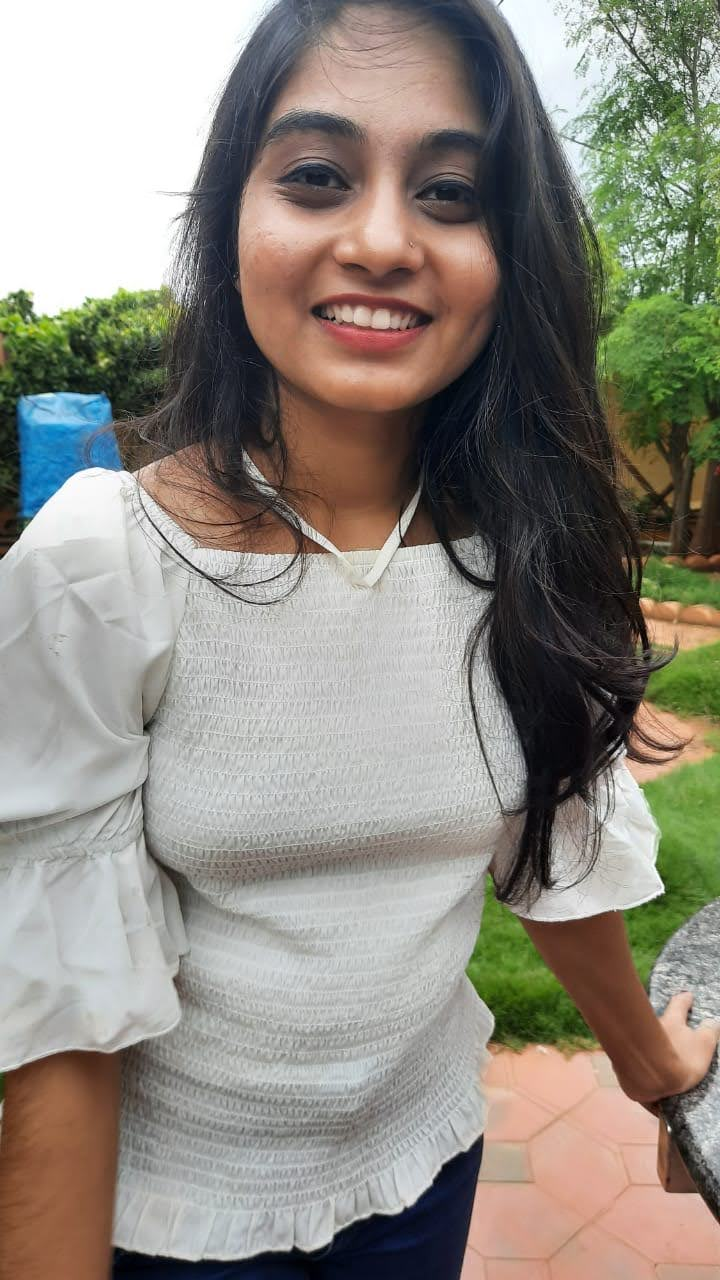

In [80]:
from google.colab.patches import cv2_imshow
import cv2
test_image = cv2.imread('IMG-20200919-WA0091.jpg')
cv2_imshow(test_image)

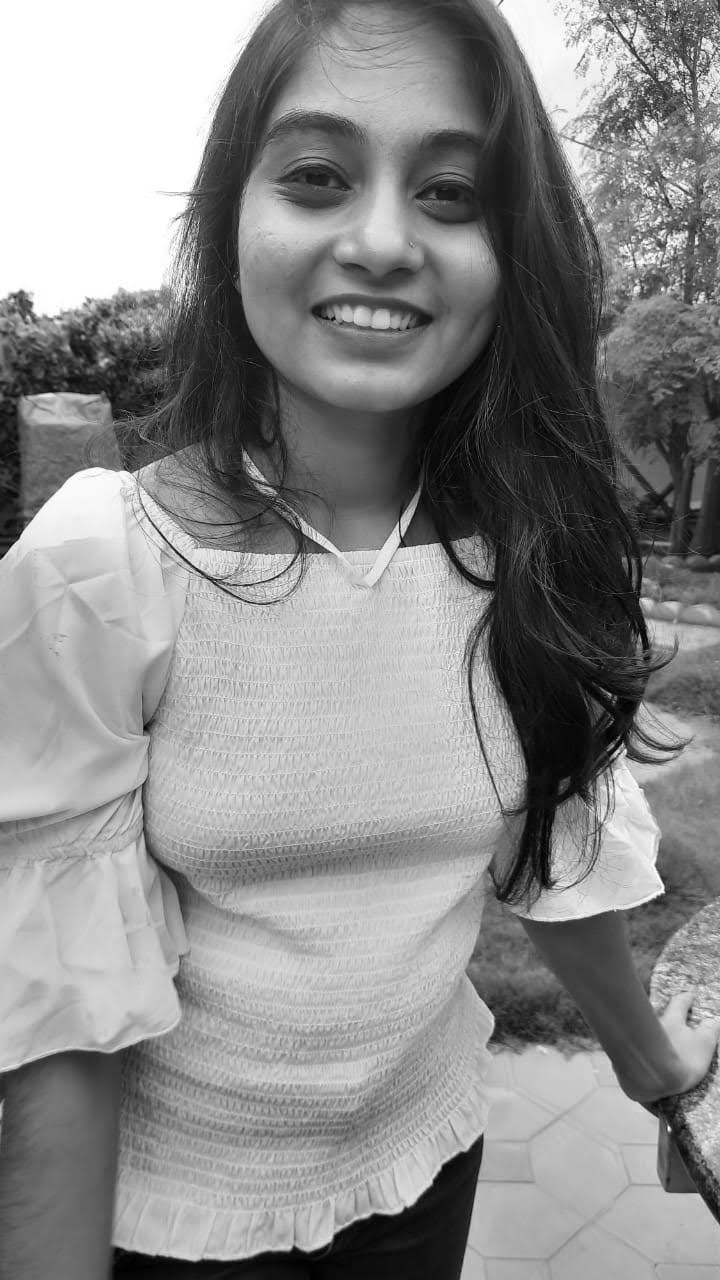

In [82]:
greay_image=cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(greay_image)

In [88]:
!pip install keras

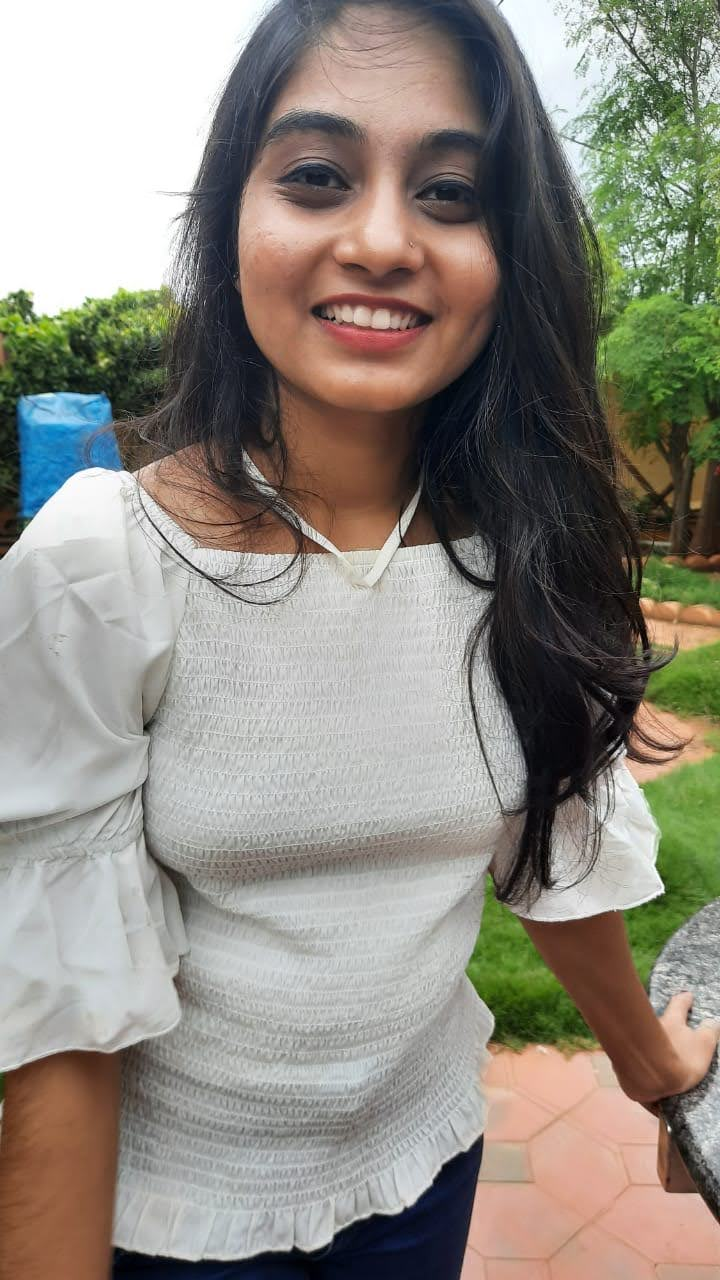

In [90]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
from keras.preprocessing.image import img_to_array
cv2_imshow(test_image)

happy


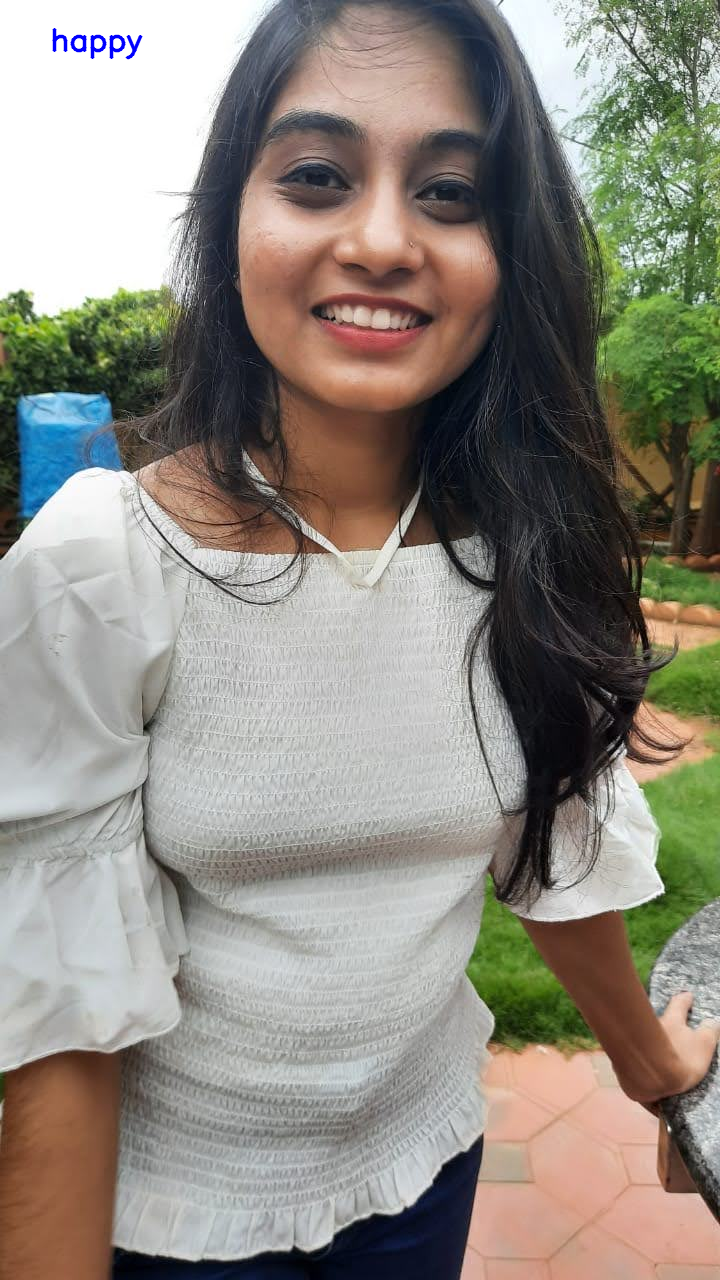

In [95]:
      faces_detected = face_haar_cascade.detectMultiScale(greay_image, 1.32, 5)
      for (x,y,w,h) in faces_detected:

        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=greay_image[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]
        print(predicted_emotion)
        font = cv2.FONT_HERSHEY_SIMPLEX
        org = (50,50)
        fontScale=1
        color=(255,0,0)
        thickness=2
        image = cv2.putText(test_image,predicted_emotion,org,font,fontScale,color,thickness,cv2.LINE_AA)
        cv2_imshow(image)

        #cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    #resized_img = cv2.resize(test_img, (1000, 700))
    #cv2.imshow('Facial emotion analysis ',resized_img)



    #if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
      #  break

#cap.release()
#cv2.destroyAllWindows